# Predicting Insurance Premiuim Cost for ABC Inc.

Debanjan Chowdhury
Data 602

## Summary

ABC Inc. is a startup in the Washington DC area who has reached out to a health care insurance company to help them evaluate the premium based on multiple factors realting to each employees health and status. Generally, the region of the employees are calculated in insurance company, but in this case they most are based in the Washington DC area and therefore we will not be using that as a factor.Our datasets are the age, sex, bmi, # of children, smoker and the premium harges. The data has 1338 rows and 6 columns after we drop the region column. Otherwise, it was 7. Initially,  We developed two training sets prior to that for testing and training using Scikit learn. After taht step, we developed linear regression models to calculate the premiums using scikit learn and stats model api that contains the Ordinary Least Squares model to calculate the r-squared and show the summary of the entire model with slopes, intercepts and all. Some of the main challenges were the outliers as multiple x values are there and it was difficult to choose how we could remove the outliers for one of them without affecting the other one. My R-squared value is 0.746 or 74.6% reliability of the x-variable which is somewhat reliable. The closer the value is to 1 the better.

## Business Goal and Overview

I work in a healthcare insurance company and other companies come and check how much premium would be provided for their employees. ABC Inc. is a Washington Dc metro based company. Their main issue is having trouble evaluating on the healthcare benefits of different employees as some have kids, some do not and there are many factors that go into each employees needs. They would like a prediction model to evaluate the premium each employee will be pay in the long run given their age, gender, bmi, # of children, if they smoke or not. Accordingly they will decide on health benefits package on how much they will cover and how much is out of pocket. They are based in this DC area and only operate here, so region field will not be calculated here. They have provided prior datasets to with those information and the premium paid.
 
In order to predict the premiuim cost of each employee, I used linear regression model and they will be using this for their calculation for the upcoming employees. I will be using supervised learning as we are given the labeled datasets and also will be developing test and training sets to check whether the overall regression model works. This dataset was inspired from https://www.kaggle.com/teertha/ushealthinsurancedataset

### Techniques used: 
Linear Regression Model, OLS Model, Visualization techniques and some data cleaning.
Libraries used or considered: pandas, matplotlib, seaborn, statsmodel api, scikit learn

## About the Dataset and tools used

As we can see, we have 1338 rows and 7 columns. The rows represent each employe and columns represent the factors that the company is looking at while calculating the premium. 

### Libraries used

In [22]:
#potential libraries that we used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Data is being retrieved using pandas and it is a csv file
insur_prem_df = pd.read_csv("dataset/insurance.csv")

In [23]:
insur_prem_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Dimensions

In [24]:
insur_prem_df.shape

(1338, 7)

As we can see above we have 7 columns and 1338 rows in the dataset

In [25]:
insur_prem_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Exploratory Data Analysis

In [26]:
#We check for missing values and see none. 
insur_prem_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Essential Data Cleaning

Majority of the employees are located in the Washington DC area and that would be considered in the same region. Therefore, the region column would not be required. 

In [27]:
insur_prem_df = insur_prem_df.drop(columns={'region'})
insur_prem_df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [28]:
#Renamed the sex column to gender
insur_prem_df = insur_prem_df.rename(columns=({'sex':'gender'}))
insur_prem_df.head()

,age,gender,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [29]:
#Rounded the variable to two decimal places to maintain consistency
insur_prem_df['bmi'] = insur_prem_df['bmi'].round(2)
insur_prem_df['charges'] = insur_prem_df['charges'].round(2)
insur_prem_df.head()

,age,gender,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16884.92
1,18,male,33.77,1,no,1725.55
2,28,male,33.00,3,no,4449.46
3,33,male,22.70,0,no,21984.47
4,32,male,28.88,0,no,3866.86


In the above data, we notice that smoker and gender are qualitative data therefore we need to change it to a quantitative data in order to run the dataset in the linear regression model.

## Visualizations to understand the data further

As we can see in the example below. Most individuals are below the age of 20 in the company, pay less premium and have no children.

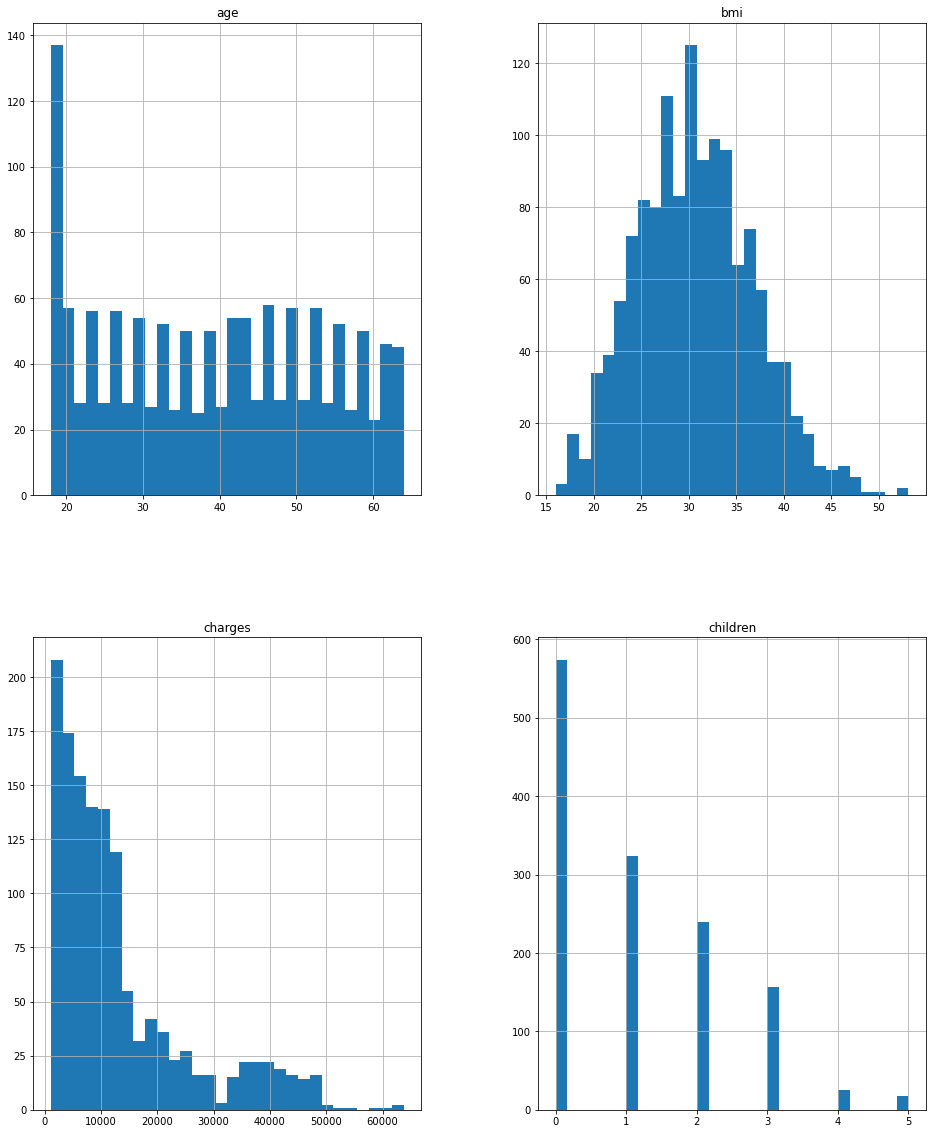

In [30]:
insur_prem_df.hist(figsize=(16,20), bins=30);

The images above show us how many individuals may have a specific charge, how many may be of a certain age, etc. As we can see, most individuals do not have childrens, are in their later teens or early 20's and have fairly low charges. These factors seem to play a role in the overall charges 

## Training and testing models

We have a few qualitative datasets and need to convert them to quantitative in order touse them in our linear gregression models. I added 1 and -1 to the columns with two rows as if I did 1 and 0 that would affect my data set. 

In [31]:
insur_prem_df_upd = insur_prem_df

updates = {"gender":{"female": 1, "male": -1},
                "smoker": {"yes": 1, "no": -1 }}
insur_prem_df_upd.replace(updates, inplace=True)
insur_prem_df_upd.head()

,age,gender,bmi,children,smoker,charges
0,19,1,27.90,0,1,16884.92
1,18,-1,33.77,1,-1,1725.55
2,28,-1,33.00,3,-1,4449.46
3,33,-1,22.70,0,-1,21984.47
4,32,-1,28.88,0,-1,3866.86


I have more than 10k datas in the dataset and therefore I divided tha data into training and test sets where I will use 20% of the data or the test size will be 20% of the total data and the training size will be the rest 80% of the total datasets. I will be using skikitlearn model for this and importing train_test_split function to split training and testing model.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(insur_prem_df_upd, shuffle = True, test_size = 0.2) # splits the data into two parts with 1:4 ratio

As we can see below, 1070 rows were taken in the training set which is about 80% of the total 1338 rows and 268

In [33]:
print(X_train.shape)
print(X_test.shape)
print(insur_prem_df_upd.shape)

(1070, 6)
(268, 6)
(1338, 6)


## Regression Plots below

We plot regression lines using the visualization library - seaborn. We see the relationship between the bmi and the charges. We can see that it is a positive relationship however the values are messy where many values are much higher than the line and they are much farther apart when we evaluate the relationship between the age and charges of the premiums people have to pay.

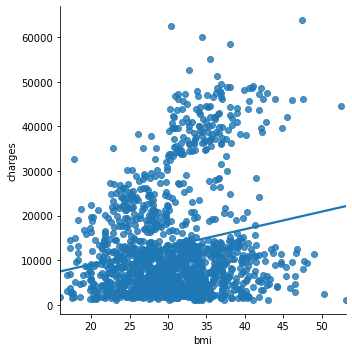

In [34]:
sns.lmplot(x = 'bmi', y = 'charges', data = insur_prem_df_upd, ci = 0)

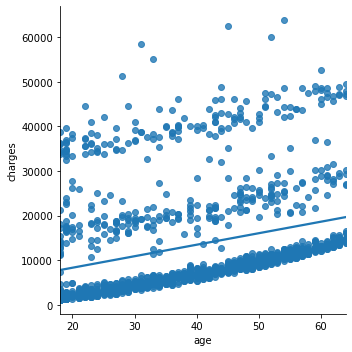

In [35]:
sns.lmplot(x = 'age', y = 'charges', data = insur_prem_df_upd, ci = 0)

We have planned on using Mean Square Root Error to evaluate the average error retreived in the model. The mean could be negative and that could affect the model and if we use absolute value then it will be point. We could also use the normal Mean Squared Error Method, but we can have toruble when negative numbers come. The MSE is our prediction nit the error or epselon that we see inthe formula normally. We try and find the best beta value that will minimize the cost function.

In [36]:
#We find the average error or mean root squared error instead of mse
##AVerage error is not the epselon
def least_squares(X,y):
    x_bar = X.mean()
    y_bar = y.mean()
    b1_num = (X - x_bar).dot(y - y_bar)
    b1_denom = ((X - x_bar)**2).sum()
    b1 = b1_num /b1_denom
    b0 = y_bar - b1*x_bar
    MSE = ((y - (b0 + b1*X))**2).sum()
    return  b0,b1, (MSE**(1/2))*1/200

least_squares(X_train.bmi, X_train.charges)


(-141.47399807845613, 449.3943737908643, 1951.5073370542457)

We get our coefficient for the first number, then we get the slope for the second one and our average square error for the third one for a specific x and y value. We can see the MRSE for each values of x and the y value in the example below.

In [37]:
print(least_squares(X_train.age, X_train.charges))
print(least_squares(X_train.gender, X_train.charges))
print(least_squares(X_train.children, X_train.charges))
print(least_squares(X_train.smoker, X_train.charges))

(3881.509969629402, 248.08094671897769, 1915.4887275030185)
(13581.721764705904, -386.6282352941176, 1999.6627004080003)
(12801.524955131845, 721.8855261879401, 1995.6136870853993)
(20313.228514085113, 11720.7266613535, 1240.1218783807824)


Our MRSE values are in the 1000's range

## Training the Models

Below, we are training the model where we are using LinearRegression from Scikit Learn. After that step, we are fitting all of our x values in the dataset and the y value. Accordingly, it provides us with the coefficiant and the intercept which are the core parts of the linear regression. In the results below, we seem to have a negative intercept, but a postive or upward moving slope for each of the x values present.

In [38]:
## Four Step workflow with sklearn
## 1. import the tool
from sklearn.linear_model import LinearRegression

## 2. instantiate the tool you would like to use.
lr = LinearRegression()

## 3. fit the model
lr.fit(X_train[["age", "gender", "bmi", "children", "smoker"]], X_train["charges"])

## 4. check-out the results or make predictions
print(lr.intercept_, lr.coef_)

-501.45696599124494 [  251.47061105   161.67147105   342.7737315    517.25409655
 11819.02794667]


We also use the statsmodel api to compare the values and it will also help us get a more detailed summary of other values from the regression model(Oridnary Least Square Method) from OLS model. Similar to the previous one, we store our X values in the X dataset and the y values int he y dataset and we must add a constant in here unlike skikit learn. WE store that entire set int he OLS model and develop it. Below is a sumamry of our datasets and the entire model results

In [39]:
## This time we will use statsmodels api

import statsmodels.api as sm

X = X_train[["age", "gender", "bmi", "children", "smoker"]]
y = X_train.charges
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     623.8
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          3.06e-313
Time:                        14:44:40   Log-Likelihood:                -10857.
No. Observations:                1070   AIC:                         2.173e+04
Df Residuals:                    1064   BIC:                         2.175e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -501.4570   1082.093     -0.463      0.6

R-squared - Variance explained in the model with the data from 0 to 1 and an R-squared is better the closer it reaches one. Ours is ok as it is on the 0.7 range, but has not reached one. 
P>[t] checks if our t values are 0.000 and in our case: bmi, age and smoker are significant to the model as those values are 0.000 the index have are statistically significant for the model

In [40]:
Xtest = X_test[["age", "gender", "bmi", "children", "smoker"]]
ytest = X_test.charges
Xtest = sm.add_constant(Xtest)

res.predict(Xtest);

## Plotting
Plotting our results for the residual plots to diagnose our linear model

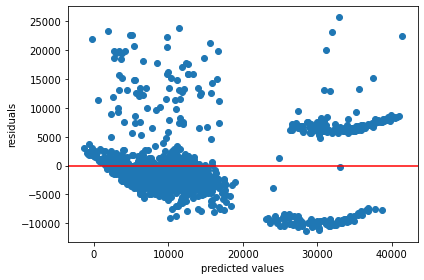

In [41]:
## To diagnose a linear model 
## it's always a good idea to check residual plots

residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')

plt.ylabel('residuals')

plt.tight_layout()

The above  plot represents our residual plots for the linear models and it seems that the values started out ok, but as they went up they did not do a good job. 

## Challenges & Limitations
I feel one of the challenge was the outliers part there were so many and it seemed that due to the fact that we had multiple x values, it was difficult to figure out where we can remove the outliers.  If we look at the outliers with respect to x1 then I felt that we may get rid of some core data in another x value. Therefore, that was somthing I had difficulty with. 

## Conclusions 
I feel that this model does evaluate we have a positive linear relationship when all of the x-values are taken into the model. However, I also feel that our residual plot and regression plots were not the best to evaluate the trends, but that is a plan to improve in the long run. Possibly, being able to evaluate which outliers or leverage points to remove, they may look relatively better. In general, medical insurance companies could look for more data into family medical history and other details. Those other factors could be taken into consideration next time. My R-squared value is 0.746 or 74.6% reliability of the x-variable which is somewhat reliable. The closer the value is to 1 the better. 